In [1]:
"""
Created on Tue March 10 2020

@author: Yona Silvy

Data : Durack & Wijffels 1950-2000 zonal changes, analyzed in density framework, gridded back to pressure levels
Make plot as in fig7 DW10
"""

import numpy as np
from scipy import io
from scipy.interpolate import griddata
import sys
import matplotlib.pyplot as plt
from maps_matplot_lib import defVarDurack, zon_2Dz, custom_div_cmap
import datetime
import gsw
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.2

# ===== Workspace =====

indir = '/data/ysilvy/Density_binning/obs/'
file = 'fig7behcfi.mat'
data = indir + file

f = io.loadmat(data)

show_isopyc = True #False

# ===== Read variables =====

var_change_p = f['Pacific_chg'].T
var_change_err_p = f['Pacific_chgerr'].T
isomean_p = f['Pacific_gmean'].T
var_change_a = f['Atlantic_chg'].T
var_change_err_a = f['Atlantic_chgerr'].T
isomean_a = f['Atlantic_gmean'].T
var_change_i = f['Indian_chg'].T
var_change_err_i = f['Indian_chgerr'].T
isomean_i = f['Indian_gmean'].T

lat=f['yi'].squeeze()
pressure = f['pressure_levels'].squeeze()

# -- Define variable properties
varname = defVarDurack('salinity'); v = 'S'
minmax = varname['minmax_zonal']
clevsm = varname['clevsm_zonal']
clevsm_bold = varname['clevsm_bold']
legVar = varname['legVar']
unit = varname['unit']

# -- Convert pressure to depth using gsw package and interpolate data
lat2d,p2d = np.meshgrid(lat,pressure)
depth = -gsw.z_from_p(p2d,lat2d)
targetz = np.copy(pressure)
var_change_a_z = np.empty((len(targetz),len(lat)))
var_change_p_z = np.empty((len(targetz),len(lat)))
var_change_i_z = np.empty((len(targetz),len(lat)))
var_change_err_a_z = np.empty((len(targetz),len(lat)))
var_change_err_p_z = np.empty((len(targetz),len(lat)))
var_change_err_i_z = np.empty((len(targetz),len(lat)))
isomean_a_z = np.empty((len(targetz),len(lat)))
isomean_p_z = np.empty((len(targetz),len(lat)))
isomean_i_z = np.empty((len(targetz),len(lat)))
for ilat in range(len(lat)):
    var_change_a_z[:,ilat] = griddata(depth[:,ilat],var_change_a[:,ilat],targetz)
    var_change_p_z[:,ilat] = griddata(depth[:,ilat],var_change_p[:,ilat],targetz)
    var_change_i_z[:,ilat] = griddata(depth[:,ilat],var_change_i[:,ilat],targetz)
    var_change_err_a_z[:,ilat] = griddata(depth[:,ilat],var_change_err_a[:,ilat],targetz)
    var_change_err_p_z[:,ilat] = griddata(depth[:,ilat],var_change_err_p[:,ilat],targetz)
    var_change_err_i_z[:,ilat] = griddata(depth[:,ilat],var_change_err_i[:,ilat],targetz)
    isomean_a_z[:,ilat] = griddata(depth[:,ilat],isomean_a[:,ilat],targetz)
    isomean_p_z[:,ilat] = griddata(depth[:,ilat],isomean_p[:,ilat],targetz)
    isomean_i_z[:,ilat] = griddata(depth[:,ilat],isomean_i[:,ilat],targetz)

# -- Depth domain for the plot
domzed = [0,500,5000]

# -- Remove bad data
var_change_a_z[depth>2000]=np.nan
var_change_p_z[depth>2000]=np.nan
var_change_i_z[depth>2000]=np.nan
isomean_a_z[depth>2000]=np.nan
isomean_p_z[depth>2000]=np.nan
isomean_i_z[depth>2000]=np.nan

# -- Make variable bundles for each basin
varAtl = {'name': 'Atlantic', 'var_change': var_change_a_z, 'var_mean':None,
          'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':isomean_a_z}
varPac = {'name': 'Pacific', 'var_change': var_change_p_z, 'var_mean':None,
          'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':isomean_p_z}
varInd = {'name': 'Indian', 'var_change': var_change_i_z, 'var_mean':None,
          'bowl1': None, 'bowl2': None, 'labBowl': None, 'density':isomean_i_z}


In [2]:
zbowl_a = np.empty(len(lat))
zbowl_p = np.empty(len(lat))
zbowl_i = np.empty(len(lat))
for ilat in range(len(lat)):
    iz_a = np.isnan(var_change_a_z[:,ilat]).argmin() # First non nan element
    iz_p = np.isnan(var_change_p_z[:,ilat]).argmin()
    iz_i = np.isnan(var_change_i_z[:,ilat]).argmin()
    zbowl_a[ilat] = targetz[iz_a]
    zbowl_p[ilat] = targetz[iz_p]
    zbowl_i[ilat] = targetz[iz_i]

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


2020-06-18


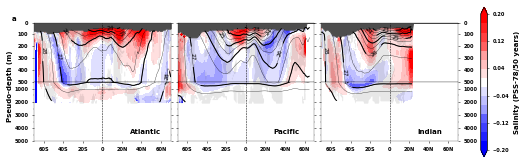

In [6]:
# ===== PLOT ======

# -- Create figure and axes instances
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 2))

# -- color map
cmap = custom_div_cmap()

# -- levels
levels = np.linspace(minmax[0],minmax[1],minmax[2])

# Dictionary
ext_cmap = 'both'
contourDict = {'cmap':cmap, 'levels':levels, 'levels2':levels, 'ext_cmap':ext_cmap, 'isopyc':show_isopyc}

# -- Error field
# Atlantic
var_change_err_a_z = var_change_err_a_z * 1.1  # to account for a potential underestimation of the error determined by a bootstrap analysis
var_change_err_a_z = var_change_err_a_z * 1.64  # 90% confidence level
not_signif_change_a_z = np.where(np.absolute(var_change_a_z) < var_change_err_a_z, 1, 0)
not_signif_change_a_z[np.isnan(var_change_err_a_z).nonzero()] = -100 
# Pacific
var_change_err_p_z = var_change_err_p_z * 1.1  # to account for a potential underestimation of the error determined by a bootstrap analysis
var_change_err_p_z = var_change_err_p_z * 1.64  # 90% confidence level
not_signif_change_p_z = np.where(np.absolute(var_change_p_z) < var_change_err_p_z, 1, 0)
not_signif_change_p_z[np.isnan(var_change_err_p_z).nonzero()] = -100 
# Indian
var_change_err_i_z = var_change_err_i_z * 1.1  # to account for a potential underestimation of the error determined by a bootstrap analysis
var_change_err_i_z = var_change_err_i_z * 1.64  # 90% confidence level
not_signif_change_i_z = np.where(np.absolute(var_change_i_z) < var_change_err_i_z, 1, 0)
not_signif_change_i_z[np.isnan(var_change_err_i_z).nonzero()] = -100 

# -- Contourf of signal
cnplot = zon_2Dz(plt,axes[0,0], axes[1,0], 'left', lat, targetz, varAtl,
                 contourDict, domzed)
cnplot = zon_2Dz(plt,axes[0,1], axes[1,1], 'mid', lat, targetz, varPac,
                 contourDict, domzed)
cnplot = zon_2Dz(plt,axes[0,2], axes[1,2], 'right', lat, targetz, varInd,
                 contourDict, domzed)

# -- Draw areas where signal is not significant
lat2d,lev2d = np.meshgrid(lat,targetz)
for i in range(2):
    axes[i,0].contourf(lat2d, lev2d, not_signif_change_a_z, levels=[0.25,0.5,1.5], colors='None',
                       hatches=['','......'])
    axes[i,1].contourf(lat2d, lev2d, not_signif_change_p_z, levels=[0.25,0.5,1.5], colors='None',
                       hatches=['','......']) 
    axes[i,2].contourf(lat2d, lev2d, not_signif_change_i_z, levels=[0.25,0.5,1.5], colors='None',
                       hatches=['','......'])
# Draw dark grey in bowl
axes[0,0].fill_between(lat,y1=0,y2=zbowl_a,color='0.3')
axes[0,1].fill_between(lat,y1=0,y2=zbowl_p,color='0.3')
axes[0,2].fill_between(lat,y1=0,y2=zbowl_i,color='0.3')

axes[0,1].tick_params(axis='both',labelleft=False,which='both',top=False,bottom=False)
axes[1,1].tick_params(axis='both',labelleft=False,which='both',top=False)
axes[0,2].tick_params(axis='both',labelleft=False,which='both',top=False,bottom=False)
axes[1,2].tick_params(axis='both',labelleft=False,which='both',top=False)
axes[0,0].tick_params(axis='x',which='both',top=False,bottom=False)
axes[1,0].tick_params(axis='x',which='both',top=False)

plt.subplots_adjust(hspace=.014, wspace=0.05, left=0.05, right=0.95,top=0.95)
plt.figtext(.003,.27,'Pseudo-depth (m)',rotation='vertical',fontweight='bold',ha='center',fontsize=7)

plt.figtext(.006,.96,'a',fontweight='bold',fontsize=7)

# -- Add colorbar
cb = plt.colorbar(cnplot[0], ax=axes.ravel().tolist(), ticks=levels[::3], fraction=0.015, shrink=1.5, pad=0.05)
cb.set_label('%s (%s/50 years)' % (legVar, unit), fontweight='bold',fontsize=7)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontweight='bold')
cb.ax.yaxis.set_tick_params(which='major',width=0.5,length=2,labelsize=5)
for axis in ['top','bottom','left','right']:
    cb.ax.spines[axis].set_linewidth(0.25)


# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print(date)

plt.savefig('fig1a.pdf', bbox_inches='tight',dpi=300) 